In [3]:
import time 
import datetime
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
months = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 
         'September': 9, 'October': 10, 'November': 11, 'December': 12}

def convert_airdate_to_datetime(airdate_str):
    try: 
        day, month, year, country = airdate_str.split(' ')
        int(day)
        months[month]
        int(year)
    except: 
        return 'Failed to convert to datetime'
    d, m, y = (int(day), months[month], int(year))
    
    return datetime.datetime(year=y, month=m, day=d)

In [21]:
# possible modes are "absolute" or "cummulative"
# pass in lists of datetimes (for different keywords) 
def display_graph_airdate_freq_vs_time(lists_of_datetimes, mode="absolute"): 
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    C = 'b'
    LABEL = 'first'
    
    for list_of_datetimes in lists_of_datetimes:
        datetimes_counts = Counter(list_of_datetimes)
        x = sorted(datetimes_counts.keys())
        y_temp = [datetimes_counts[i] for i in x]
    
        if mode == "cummulative":
            y = [sum(y_temp[:i+1]) for i in range(len(y_temp))]
        elif mode == "absolute":
            y = y_temp
        else:
            print ("Not a valid mode.")
            return

        ax1.scatter(x, y, s=10, c=C, label=LABEL)
        if C == 'b': 
            C = 'r'
            LABEL = 'second'
            # Need more colors/labels if you want more than 2 subplots
        
    plt.legend(loc='upper left');

    # beautify the x-labels
    plt.gcf().autofmt_xdate()
    myFmt = mdates.DateFormatter('%m-%d-%y')
    plt.gca().xaxis.set_major_formatter(myFmt)

    plt

In [22]:
datetimes_1 = [datetime.datetime(2015, 2, 13, 0, 0),
 datetime.datetime(2015, 2, 13, 0, 0),
 datetime.datetime(2015, 2, 13, 0, 0),
 datetime.datetime(2013, 2, 21, 0, 0),
 datetime.datetime(2015, 2, 2, 0, 0),
 datetime.datetime(2015, 2, 2, 0, 0),
 datetime.datetime(2015, 2, 9, 0, 0),
 datetime.datetime(2015, 2, 16, 0, 0),
 datetime.datetime(2011, 9, 19, 0, 0),
 datetime.datetime(2011, 9, 19, 0, 0)]

In [23]:
datetimes_2 = [datetime.datetime(2013, 10, 21, 0, 0),
 datetime.datetime(2013, 11, 11, 0, 0),
 datetime.datetime(2015, 12, 17, 0, 0),
 datetime.datetime(2016, 1, 13, 0, 0),
 datetime.datetime(2016, 1, 13, 0, 0),
 datetime.datetime(2016, 1, 13, 0, 0),
 datetime.datetime(2016, 3, 10, 0, 0),
 datetime.datetime(2016, 11, 14, 0, 0),
 datetime.datetime(2016, 12, 19, 0, 0),
 datetime.datetime(2017, 4, 3, 0, 0)]

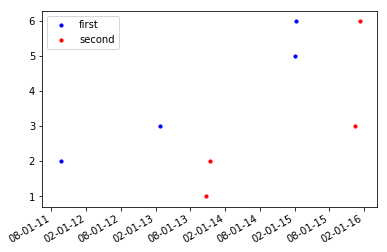

In [26]:
display_graph_airdate_freq_vs_time([datetimes_1, datetimes_2], mode="cummulative")

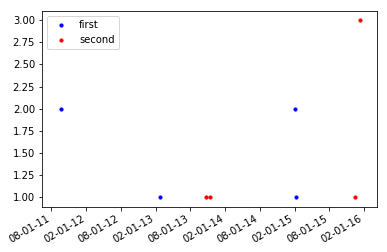

In [27]:
display_graph_airdate_freq_vs_time([datetimes_1, datetimes_2])